In [37]:
import pandas
import GSheetsData as gsd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import show
import matplotlib
import matplotlib.artist as artists
from matplotlib.pyplot import savefig
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker
from scipy import stats


df = gsd.get_data('SizeUSA_SurveyandPrimary')

In [ ]:
df.dropna(df['Waist'])

In [81]:
num_list = ['Bust', 'Waist', 'High_Hip', 'Hips', 'Mid-Neck', 'Neck_Base', 'Armscye', 'Upper_Arm', 'Elbow', 'Thigh_Max', 'Thigh_Mid', 'Knee','Calf', 'Ankle',
            'Center_Trunk', 'Crotch_Length_Total', 'Back_Neck_Point_Height', 'Cervicale_Height', 'Waist_Height', 'High_Hip_Height', 'Hips_Height',
           'Crotch_Height', 'Knee_Height', 'Ankle_Height', 'Waist_Length_Front', 'Waist_Length_Back', 'Across_Shoulder','Cross_Back_Width', 'Cross_Chest_Width',
           'Overarm_Full', 'Coat_Chest_Overarm', 'Shoulder_Length', 'Shoulder_Slope_Arctan', 'Shoulder_Slope_(degrees)', 'Arm_Length_(Shoulder_to_Wrist)',
           'Arm_Length_CBNeck_to_Wrist', 'Bust_Pt_to_Bust_Pt', 'Neck_to_Bust_Point', 'Scye_Depth']
for item in num_list:
    df[item] = df[item] * 2.54
df['Height'] = df['HeightIn'] * 2.54
df['Weight'] = df['Weight'] / 2.205
df.head()

,Survey_ID,ZipCode,Gender,AgeRange,HeightIn,Weight,ScanTop,ScanBottom,Location,EthnicCategory,...,Coat_Chest_Overarm,Shoulder_Length,Shoulder_Slope_Arctan,Shoulder_Slope_(degrees),Arm_Length_(Shoulder_to_Wrist),Arm_Length_CBNeck_to_Wrist,Bust_Pt_to_Bust_Pt,Neck_to_Bust_Point,Scye_Depth,Height
0,1004,27511.0,Male,46 - 55,76.5,17.536062,NaN,E,Cary. NC,White,...,106.0196,14.971522,1.033526,56.239156,67.924172,89.688924,22.430232,30.032960,16.474948,194.31
1,1005,27526.0,Male,56 - 65,72.5,27.609970,NaN,K,Cary. NC,White,...,130.9878,19.432351,0.822551,NaN,64.912806,89.055834,29.530368,35.300638,22.475000,184.15
2,1006,27502.0,Male,26 - 35,75.5,23.505785,NaN,H,Cary. NC,White,...,120.7262,16.424402,0.979678,53.572664,62.544452,86.604602,25.098502,31.379668,13.653008,191.77
3,1007,27529.0,Male,36 - 45,74.0,20.334370,NaN,NaN,Cary. NC,White,...,108.2040,15.197074,1.315974,69.567298,62.965076,85.027262,22.548850,28.968700,13.190728,187.96
4,1008,27519.0,Male,36 - 45,69.5,18.282277,NaN,F,Cary. NC,White,...,112.8522,14.562582,1.047496,56.924702,56.088280,78.570582,25.146254,27.528266,12.115546,176.53


In [7]:
df.describe()

,ZipCode,HeightIn,Weight,Bust,Waist,High_Hip,Hips,Mid-Neck,Neck_Base,Armscye,...,Shoulder_Length,Shoulder_Slope_Arctan,Shoulder_Slope_(degrees),Arm_Length_(Shoulder_to_Wrist),Arm_Length_CBNeck_to_Wrist,Bust_Pt_to_Bust_Pt,Neck_to_Bust_Point,Scye_Depth,Height,Weight_kg
count,10589.000000,10610.000000,10610.000000,10610.000000,10609.000000,10610.000000,10610.000000,10565.000000,10609.000000,10610.000000,...,10610.000000,10604.000000,9993.000000,10608.000000,10608.000000,10609.000000,10610.000000,10609.000000,10610.000000,10610.000000
mean,58188.148739,65.680113,166.974505,41.511715,35.386831,40.192318,42.634646,14.906875,15.886109,17.385641,...,5.290142,0.383255,22.001454,21.724390,29.583003,8.530197,10.824879,4.494208,166.827487,75.725399
std,30502.872061,3.917031,42.035794,4.981622,5.607170,5.449375,4.921197,1.865081,1.706953,2.188268,...,0.647394,0.067713,3.863987,1.811887,2.291925,1.129861,1.177247,0.773150,9.949259,19.063852
min,1.000000,48.000000,0.000000,27.886500,23.642000,27.564200,31.722800,1.711702,11.705400,9.640700,...,2.781400,0.113490,7.488600,12.561429,20.321032,0.697300,7.267500,1.636300,121.920000,0.000000
25%,30019.000000,63.000000,137.000000,37.916475,31.278400,36.345271,39.260800,13.480300,14.553900,15.816075,...,4.852400,0.337000,19.360200,20.505900,27.945600,7.790200,10.032250,4.031700,160.020000,62.131519
50%,65203.000000,65.500000,160.000000,41.024600,34.626800,39.370205,41.719100,14.732800,15.728500,17.289650,...,5.269808,0.384100,22.053100,21.653600,29.452700,8.425000,10.703000,4.355300,166.370000,72.562358
75%,90026.000000,68.000000,190.000000,44.539325,38.541300,43.081550,44.907125,16.087700,17.030800,18.810175,...,5.717775,0.430425,24.711700,22.922300,31.163875,9.196300,11.485150,4.763800,172.720000,86.167800
max,99926.000000,84.000000,467.000000,65.817780,68.806473,73.280113,79.522430,51.947600,51.408100,50.308600,...,11.336700,0.633500,36.296900,29.416400,39.275500,15.203200,18.016400,9.892962,213.360000,211.791383


In [ ]:
# numeric = ['Weight_kg', 'Height', 'Bust', 'Waist', 'High_Hip', 'Hips', 'Mid-Neck', 'Neck_Base', 'Armscye', 'Upper_Arm', 'Elbow', 'Thigh_Max', 'Thigh_Mid', 'Knee',]
           'Calf', 'Ankle', 'Center_Trunk', 'Crotch_Length_Total', 'Back_Neck_Point_Height', 'Cervicale_Height', 'Waist_Height', 'High_Hip_Height', 'Hips_Height',
           'Crotch_Height', 'Knee_Height', 'Ankle_Height', 'Waist_Length_Front', 'Waist_Length_Back', 'Across_Shoulder','Cross_Back_Width', 'Cross_Chest_Width',
           'Overarm_Full', 'Coat_Chest_Overarm', 'Shoulder_Length', 'Shoulder_Slope_Arctan', 'Shoulder_Slope_(degrees)', 'Arm_Length_(Shoulder_to_Wrist)',
           'Arm_Length_CBNeck_to_Wrist', 'Bust_Pt_to_Bust_Pt', 'Neck_to_Bust_Point', 'Scye_Depth']


In [78]:
def build_chart(data, col_name):
    data = data.dropna(subset=[col_name])
    fig = plt.figure(figsize=(25,8))
    ax1 = plt.subplot2grid((2,8), (0,0), colspan=7)
    ax2 = plt.subplot2grid((2,3), (1, 0))
    ax3 = plt.subplot2grid((2,3), (1, 1))
    ax4 = plt.subplot2grid((2,3), (1, 2))

    ax1.set_title(col_name, fontsize=20)

    text1 = 'min = ' + str(data[col_name].min())
    text2 = 'max = ' + str(data[col_name].max())
    text3 = '$\mu=$' + str(data[col_name].mean())
    text4 = '$\sigma=$' + str(data[col_name].std(ddof=0))
    text6 = 'count = ' + str(df[col_name].count())
    sns.set(rc={'figure.figsize':(25,10)})
    sns.boxplot(data[col_name], ax=ax1)
    sns.distplot(data[col_name], kde=False, ax=ax2)
    sns.distplot(data[col_name], hist=False, ax=ax3)
    sns.distplot(data[col_name], rug=True, ax=ax4)

    fig.legend(labels=[text1, text2, text3, text4, text6],loc='upper right', bbox_to_anchor=(0.8, 0.8), handlelength=0)

/home/user/.local/share/virtualenvs/lab-hhR20x4a/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


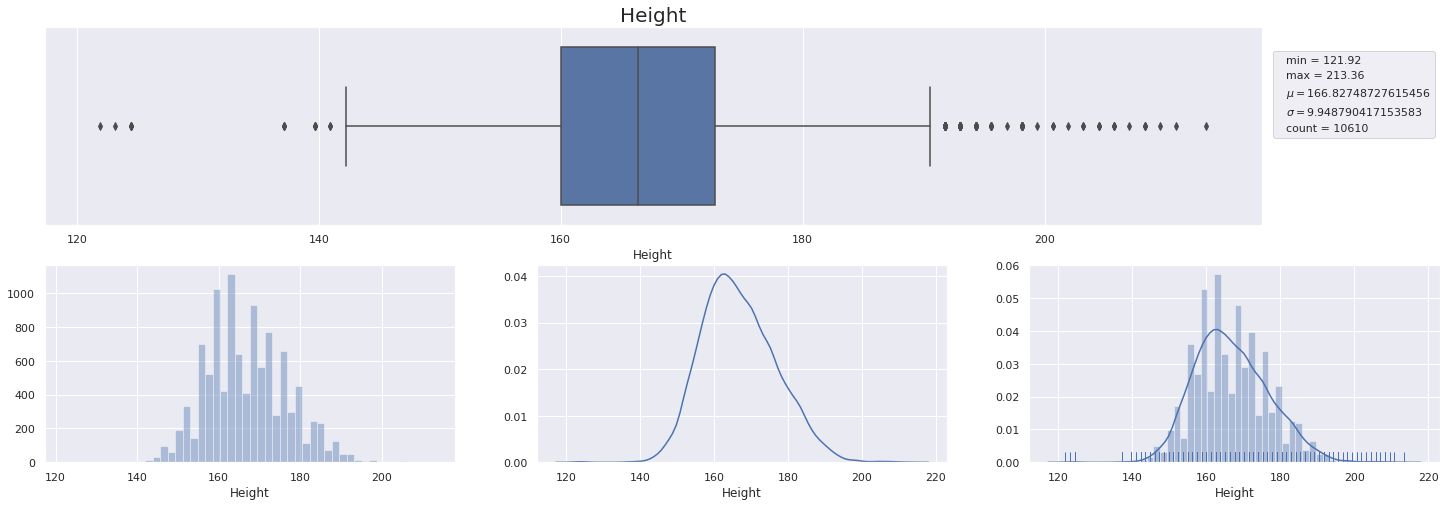

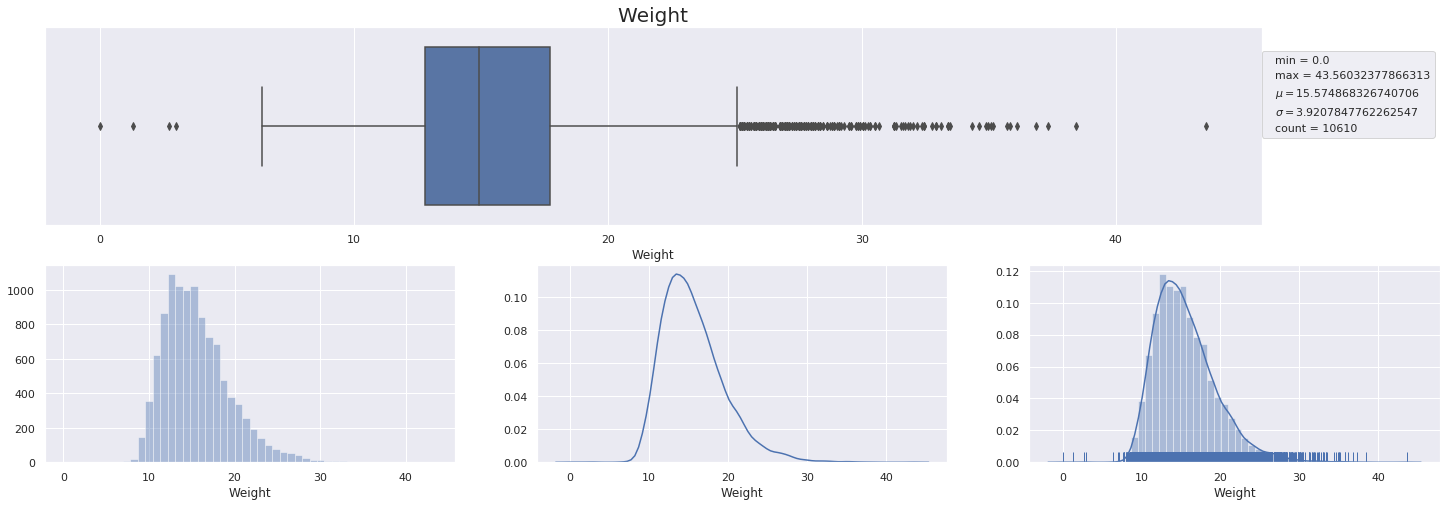

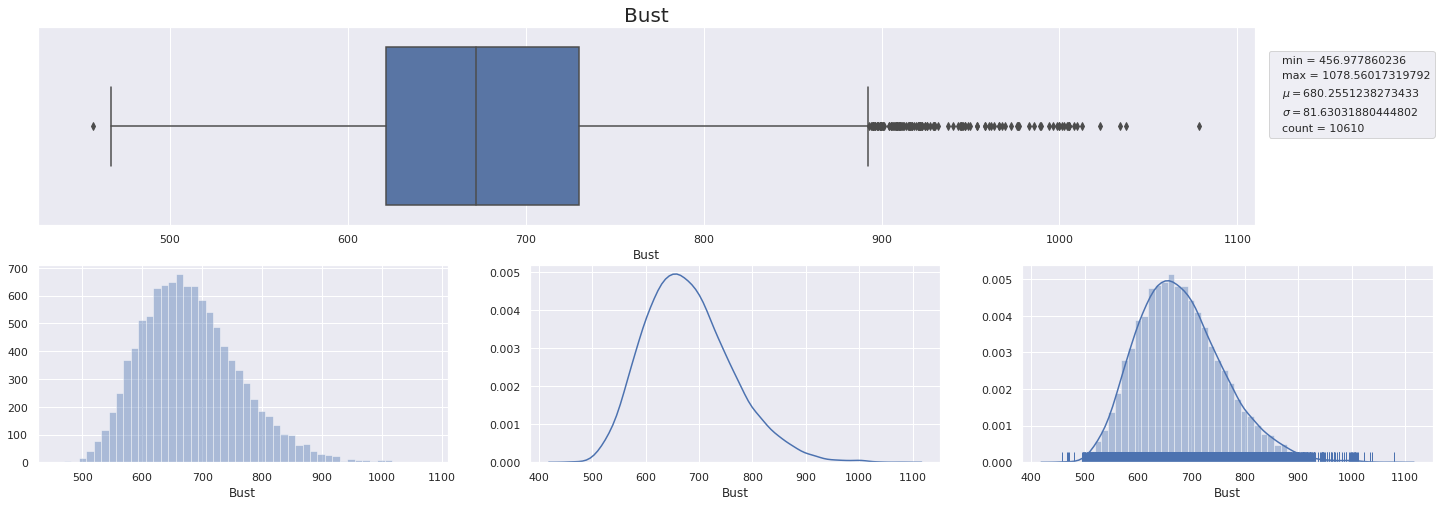

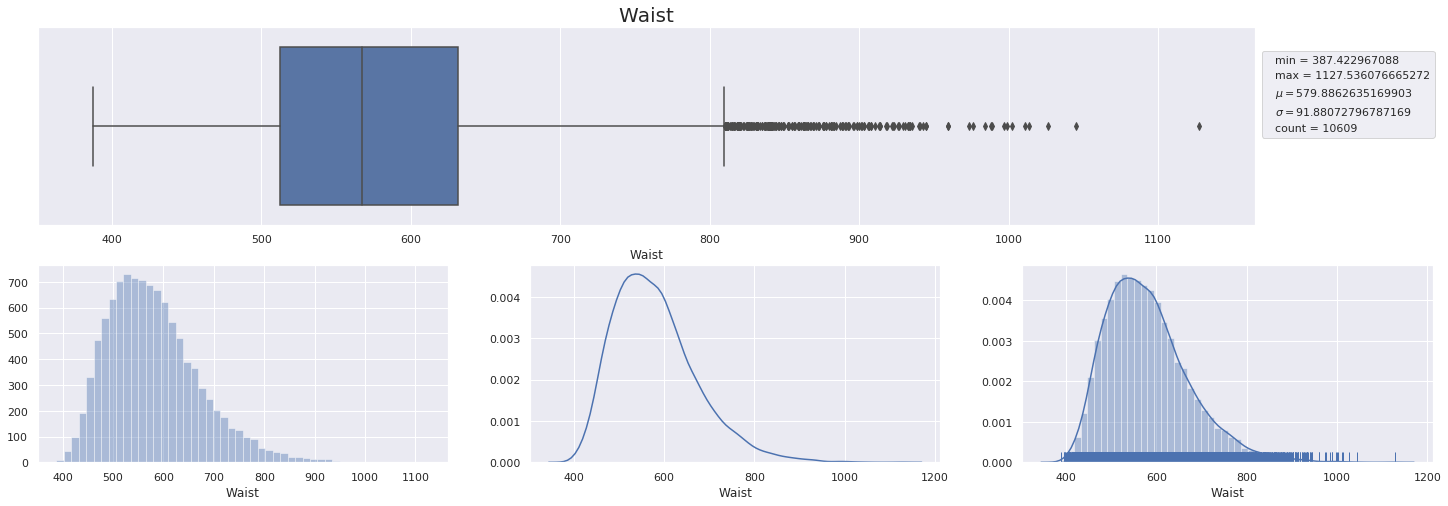

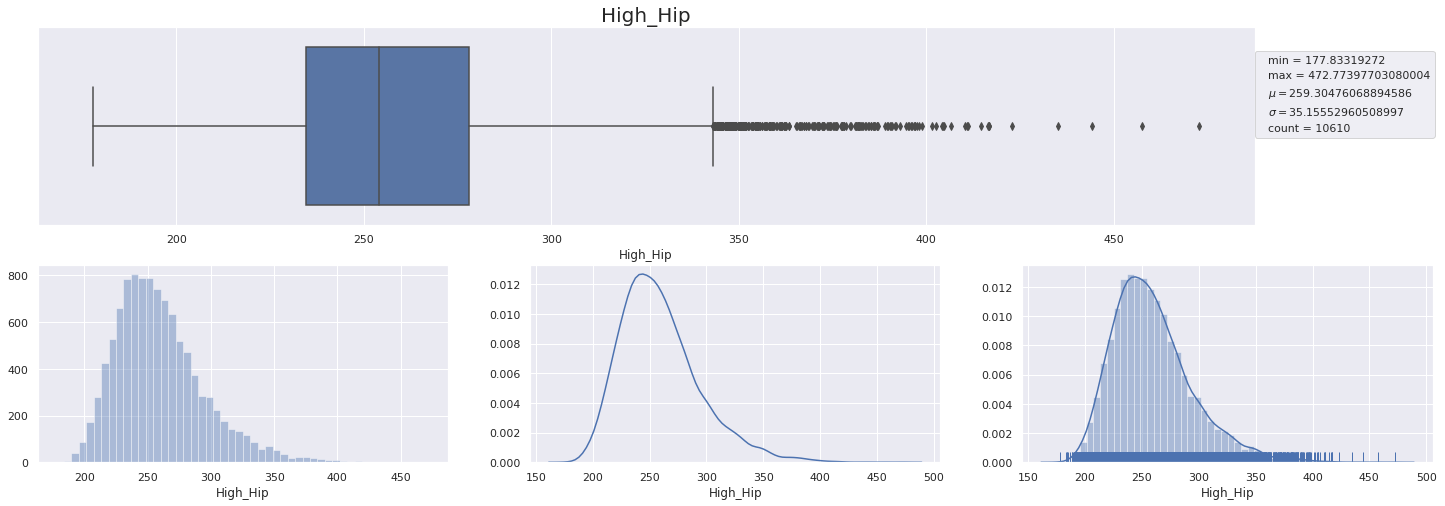

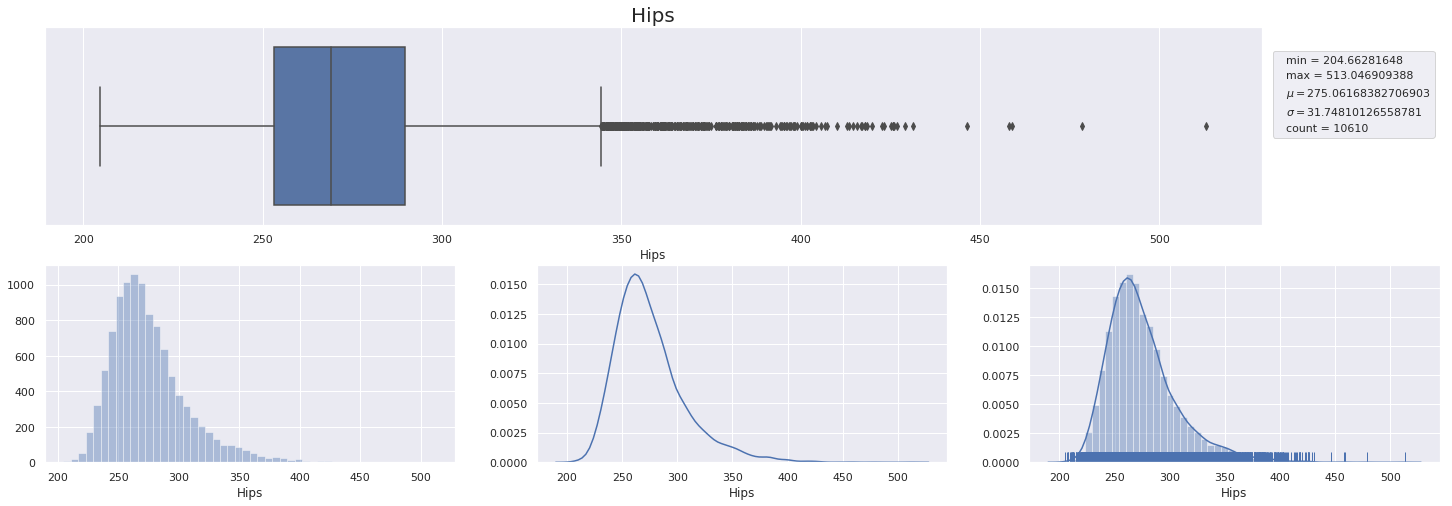

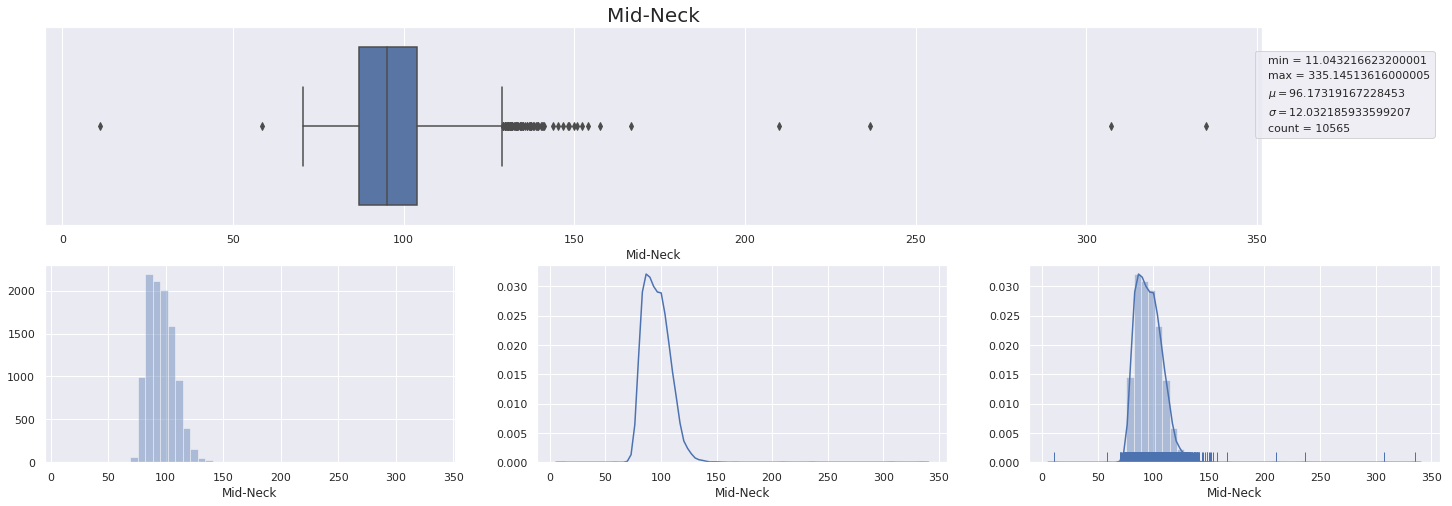

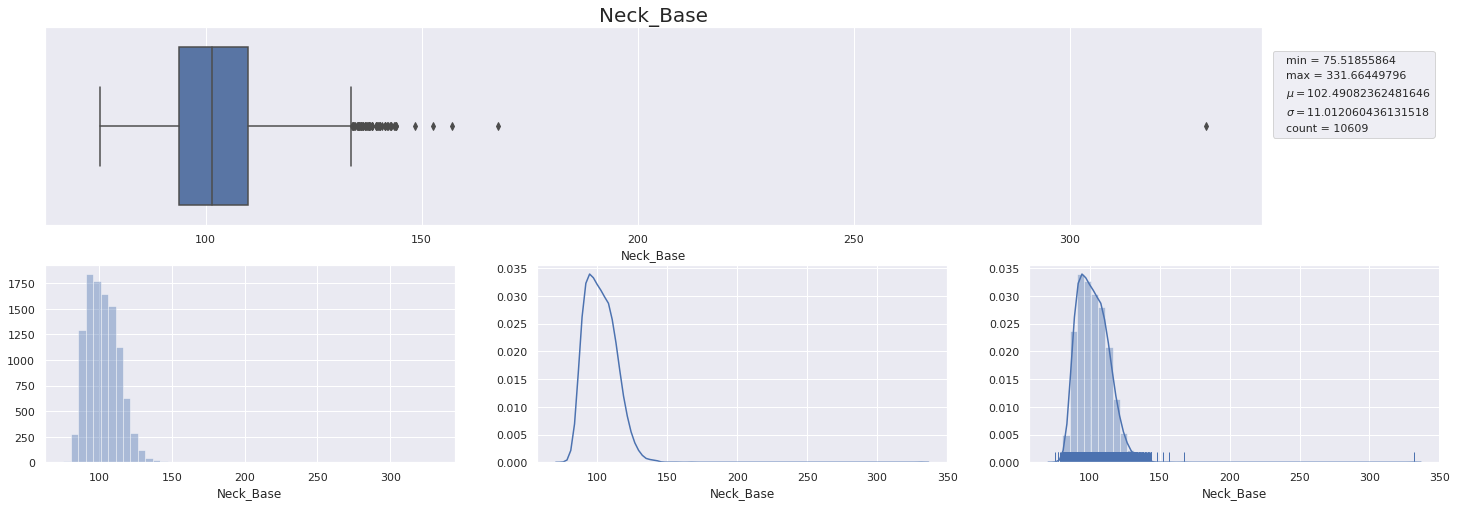

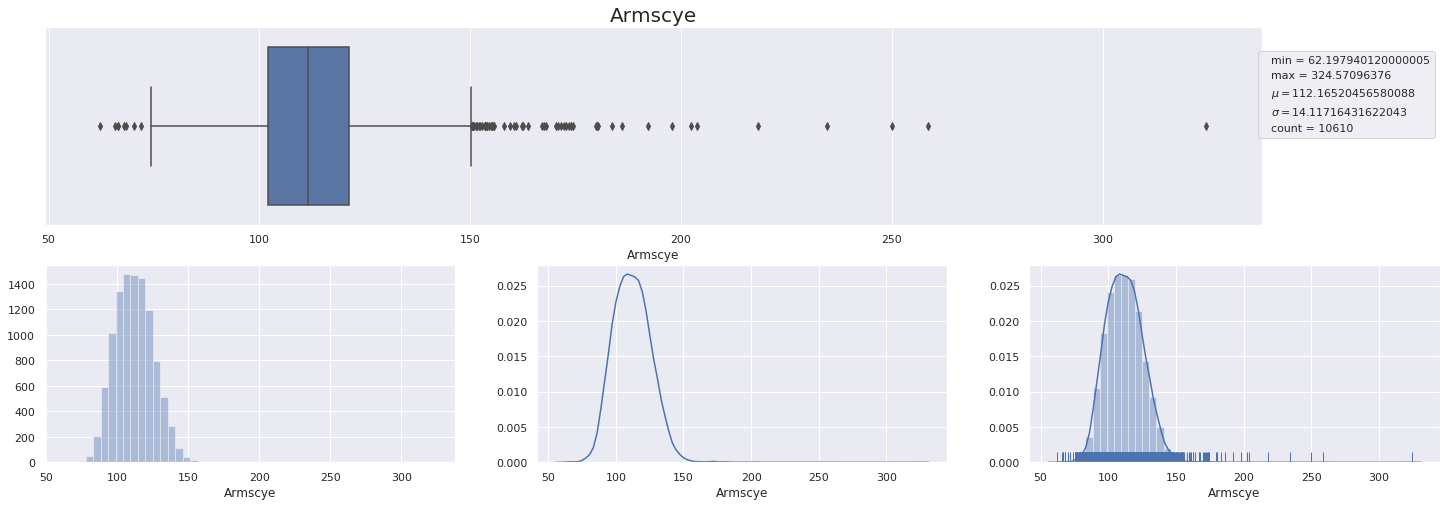

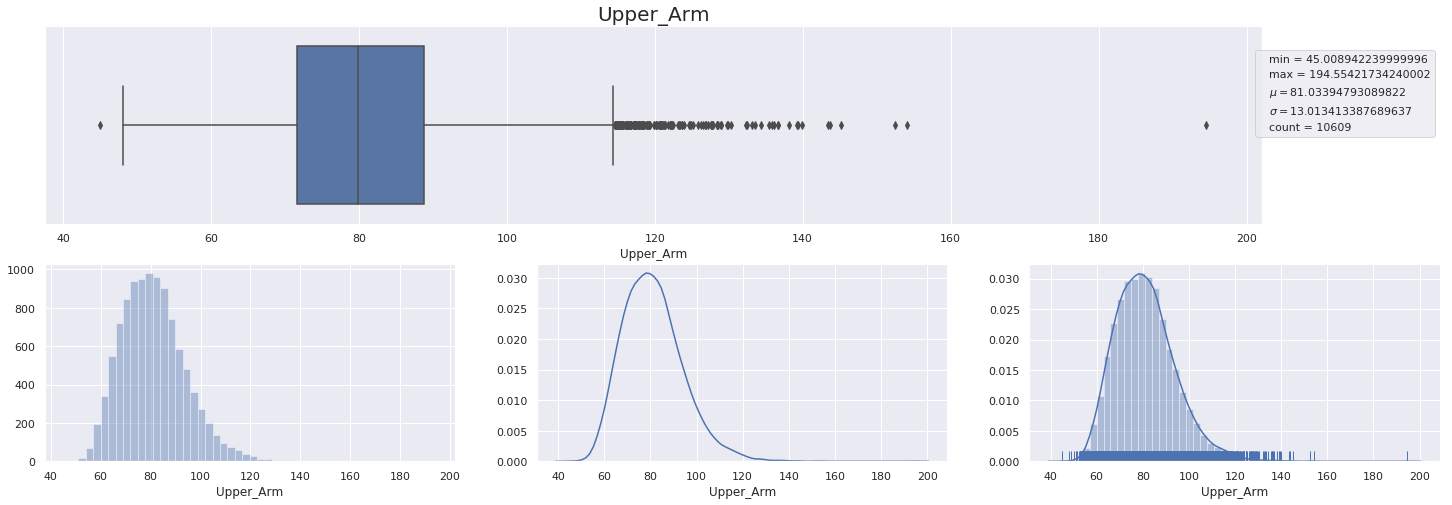

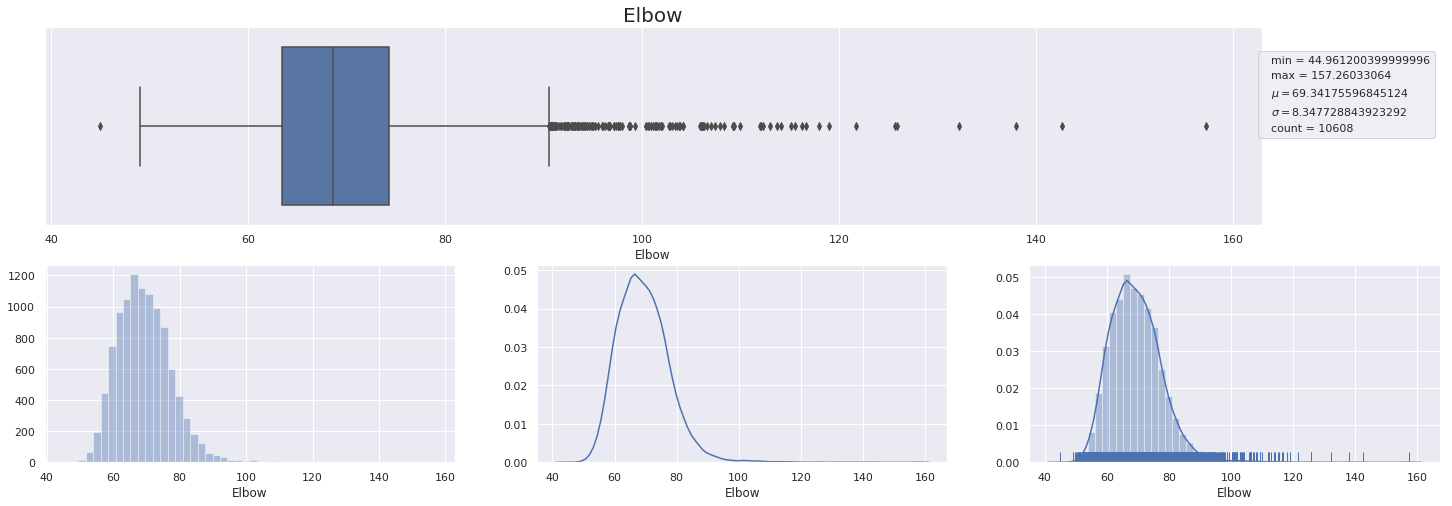

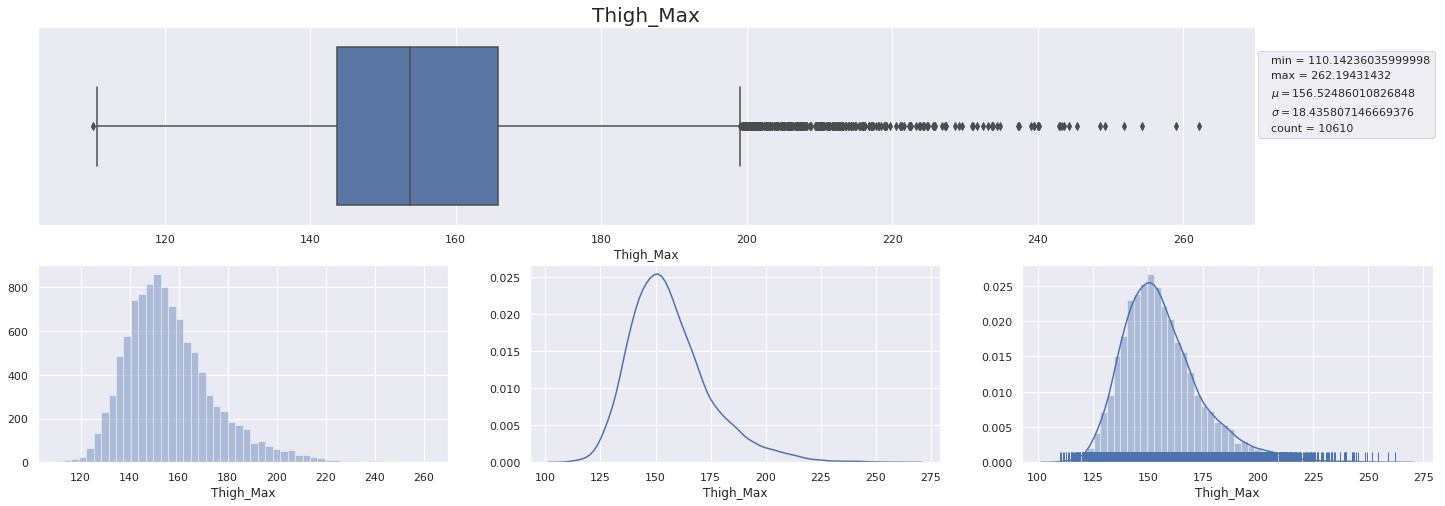

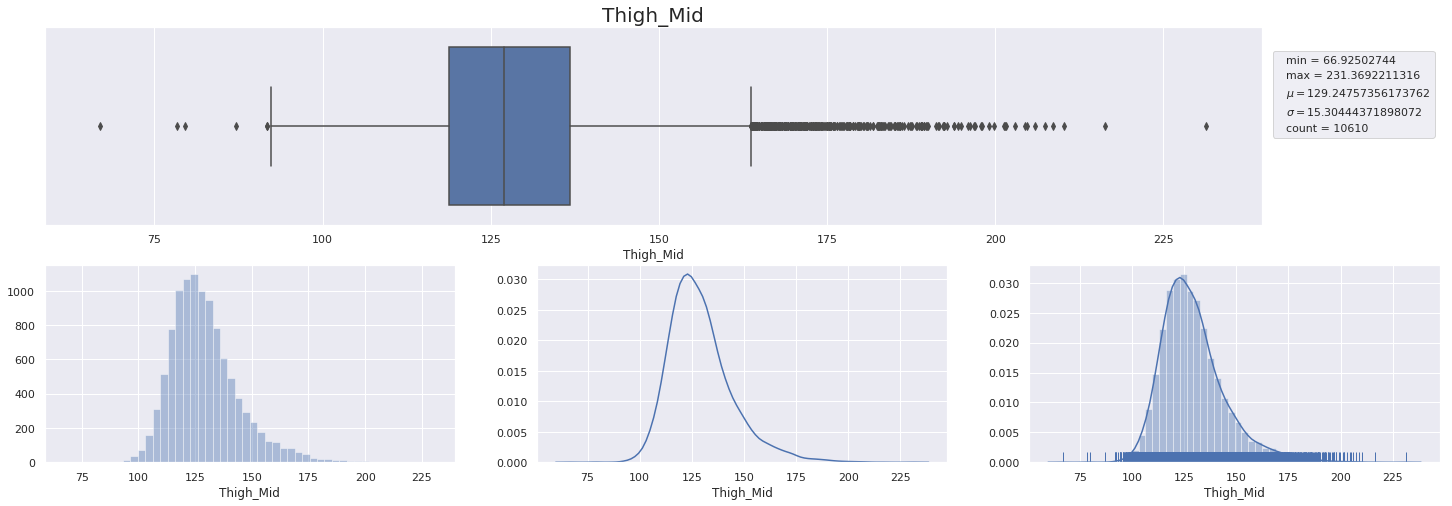

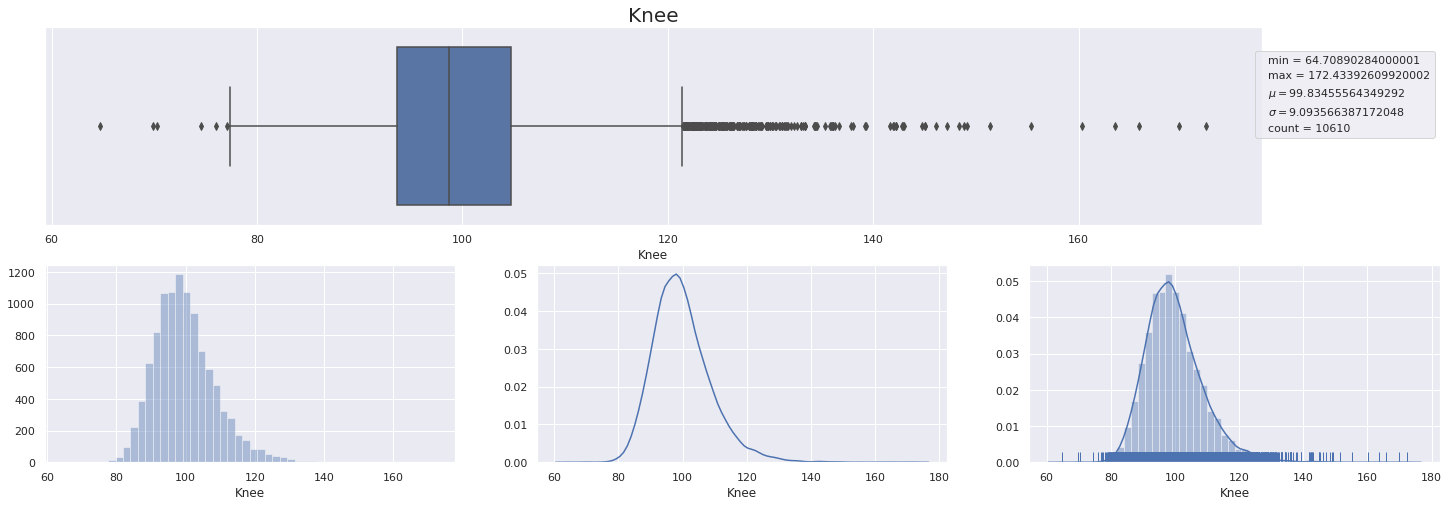

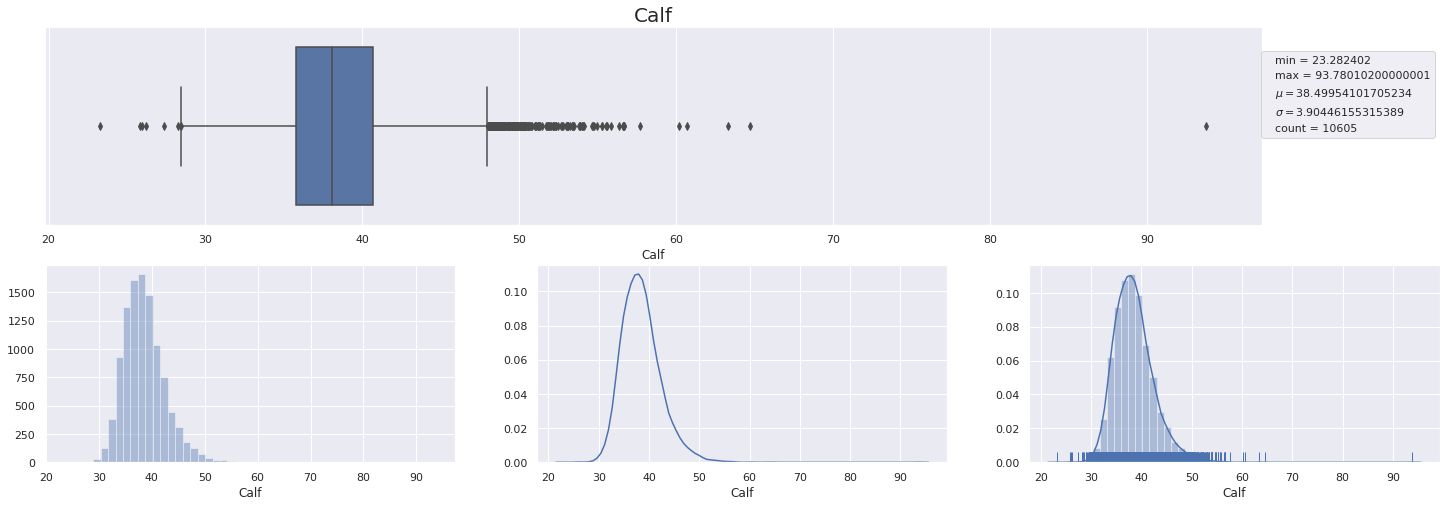

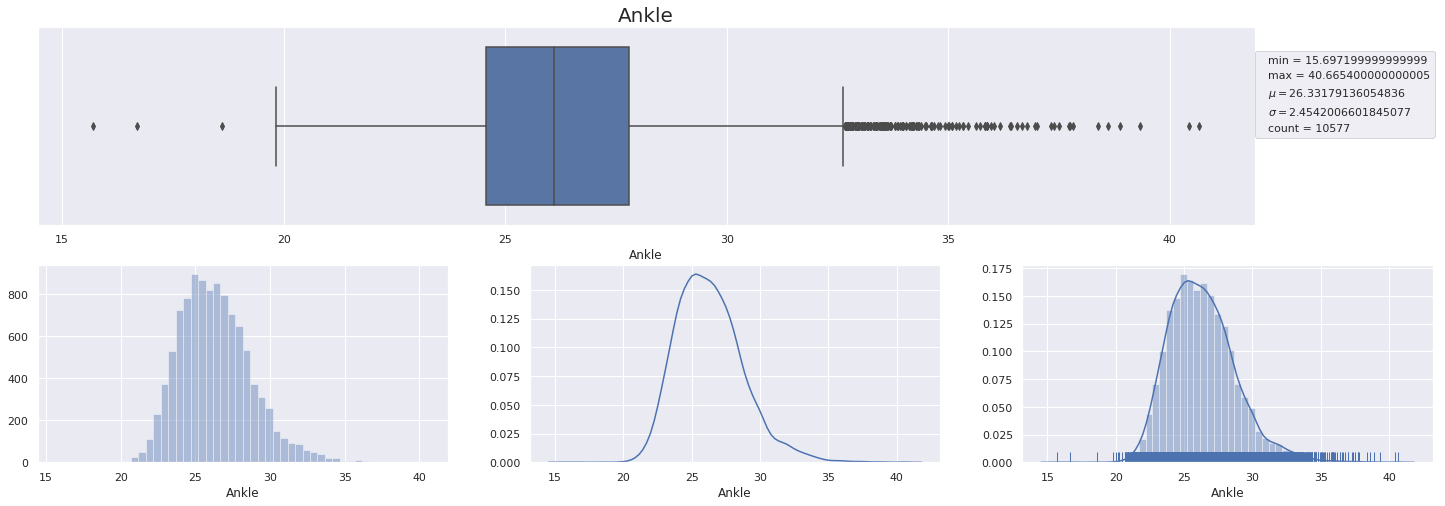

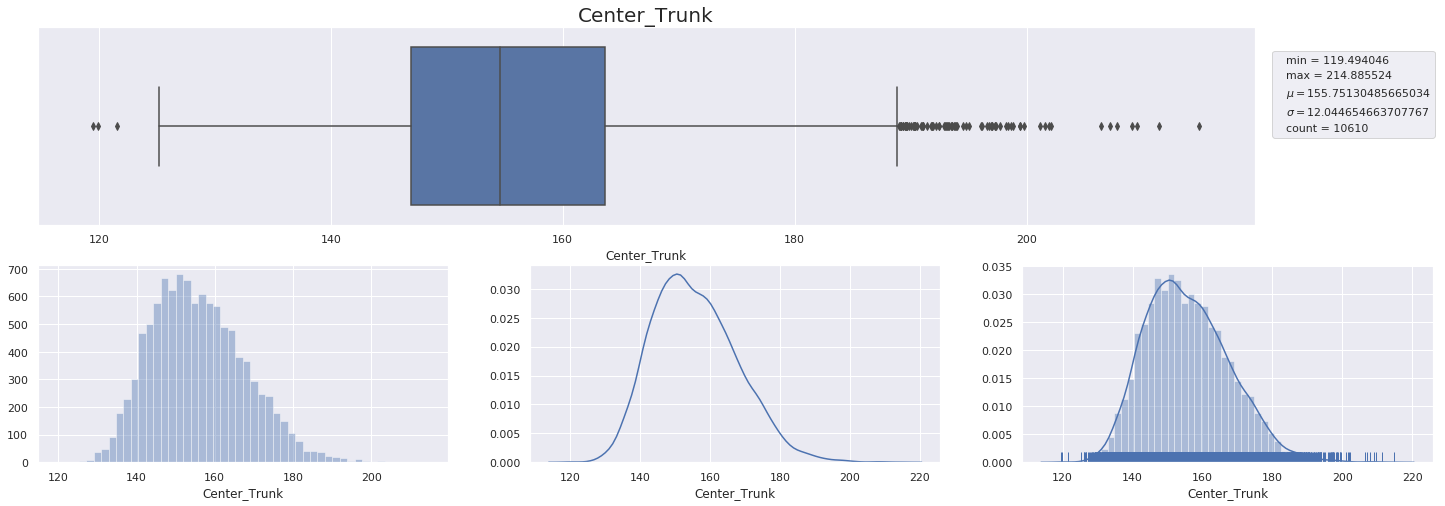

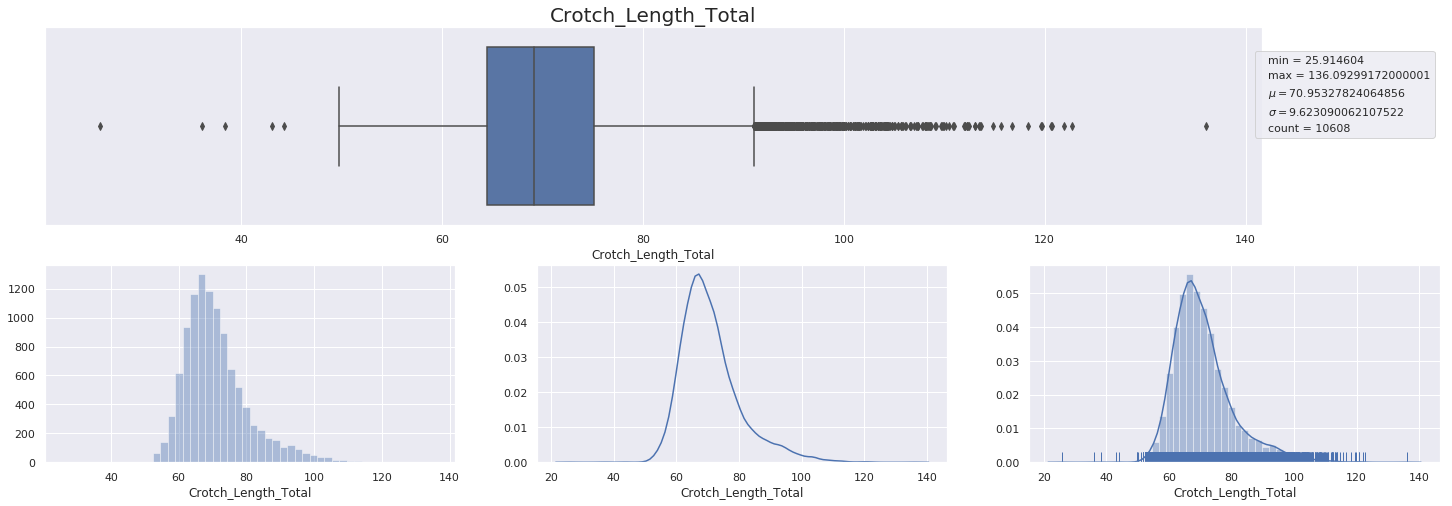

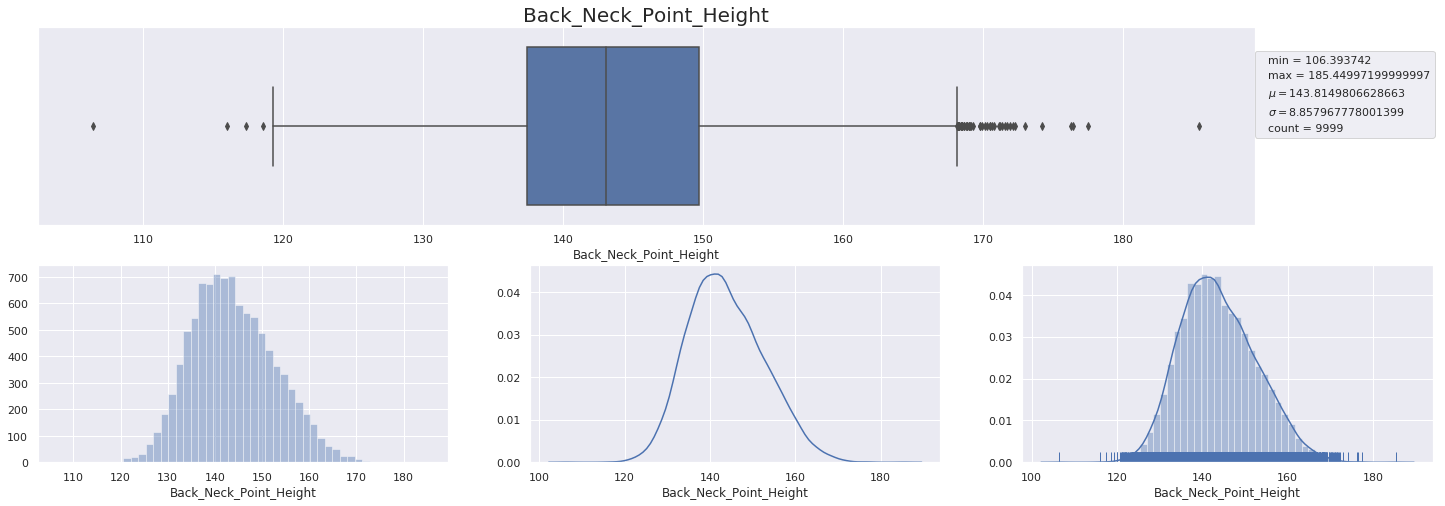

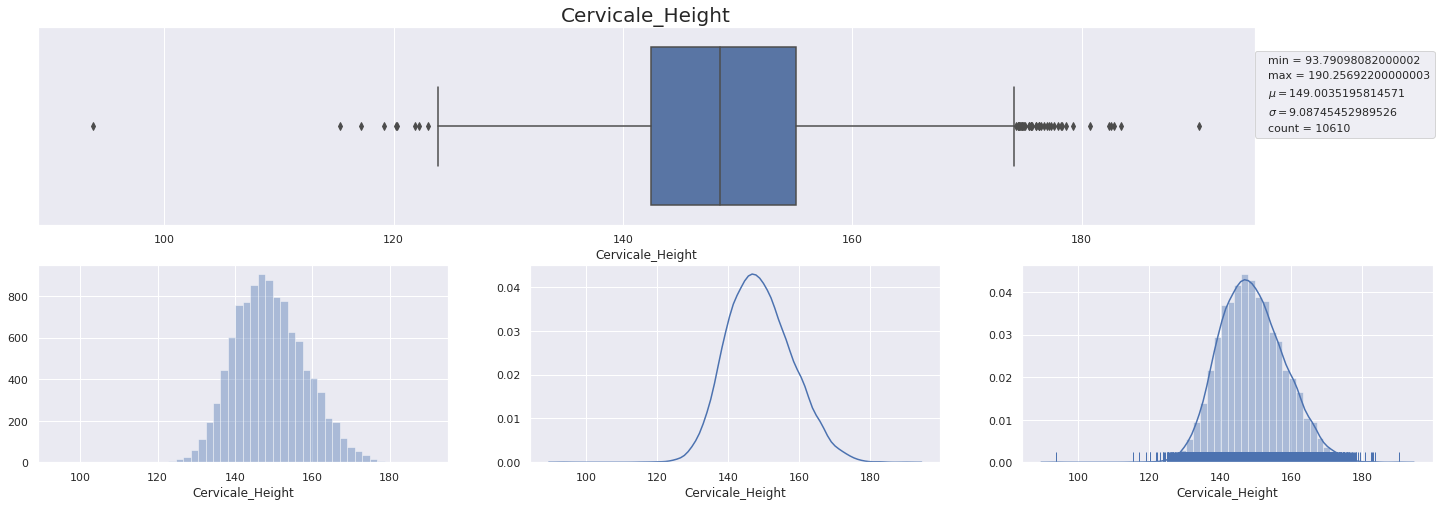

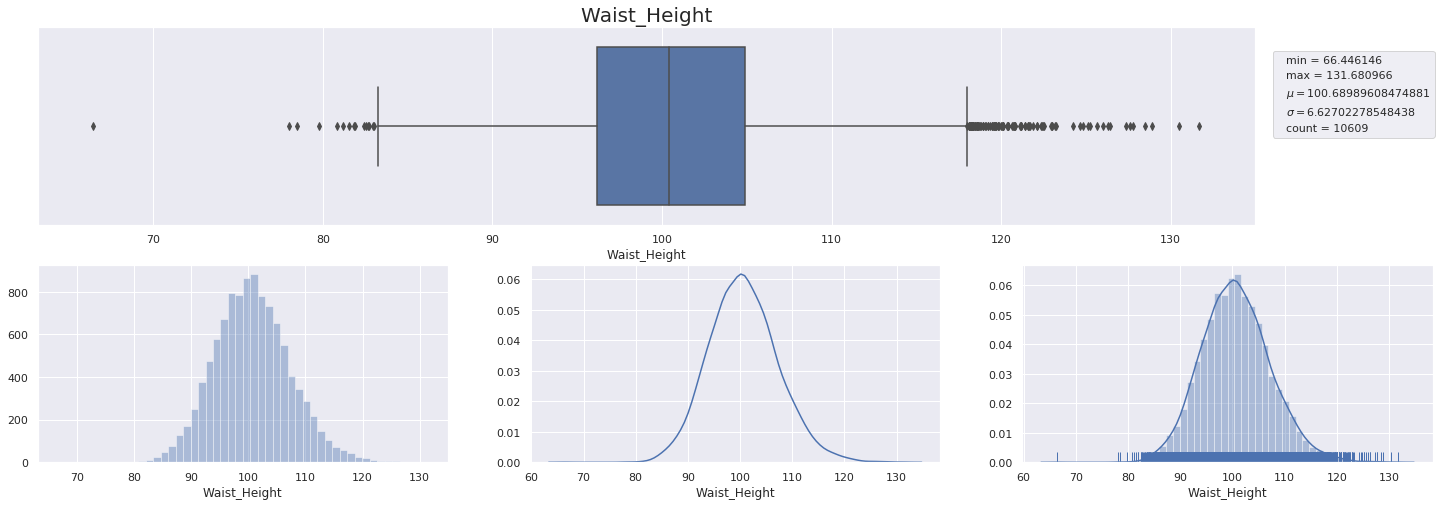

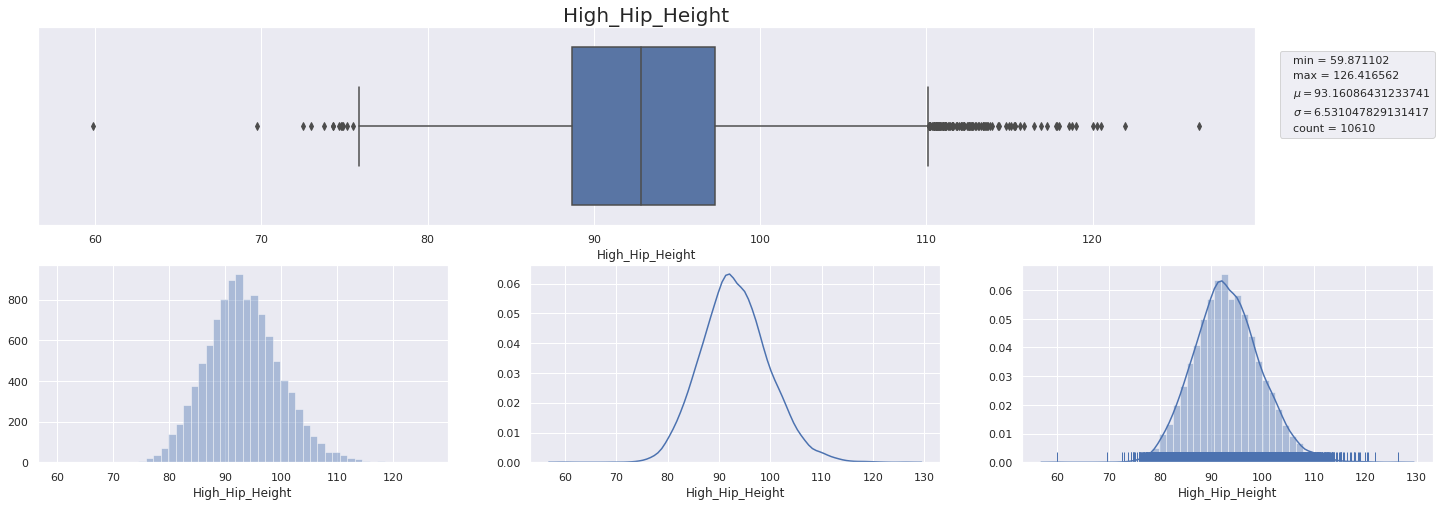

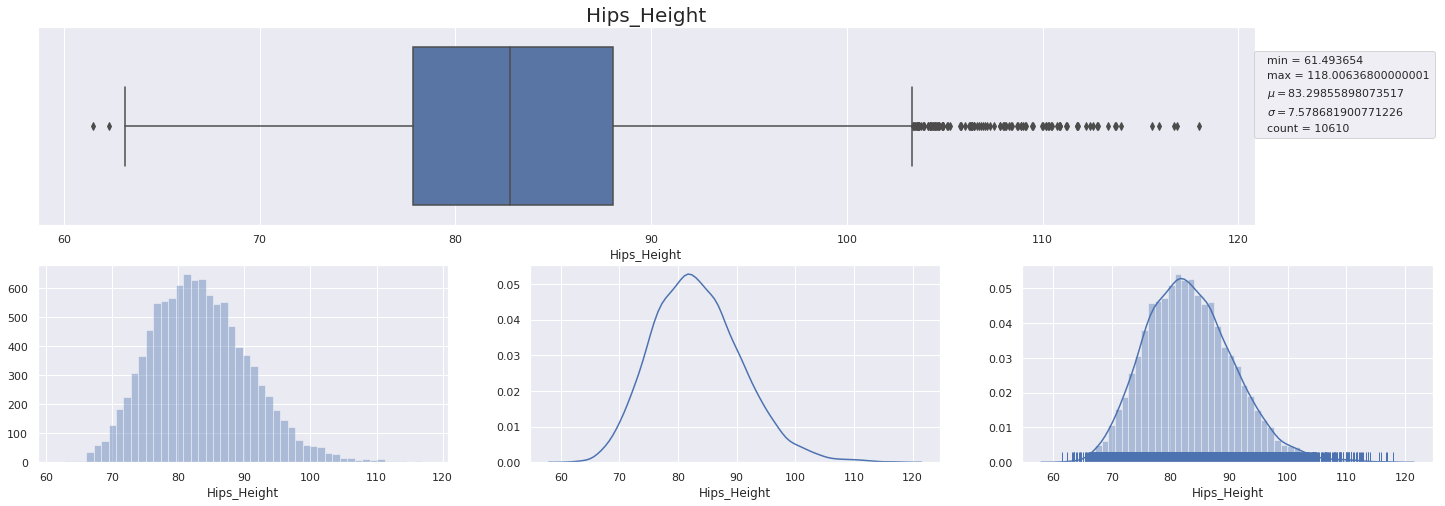

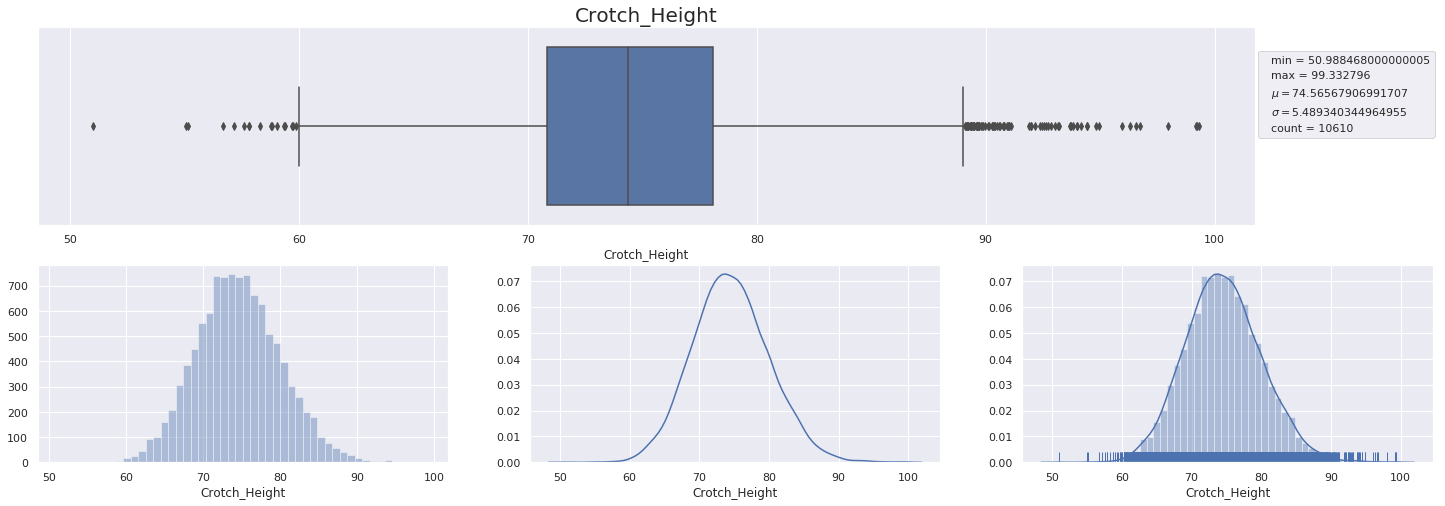

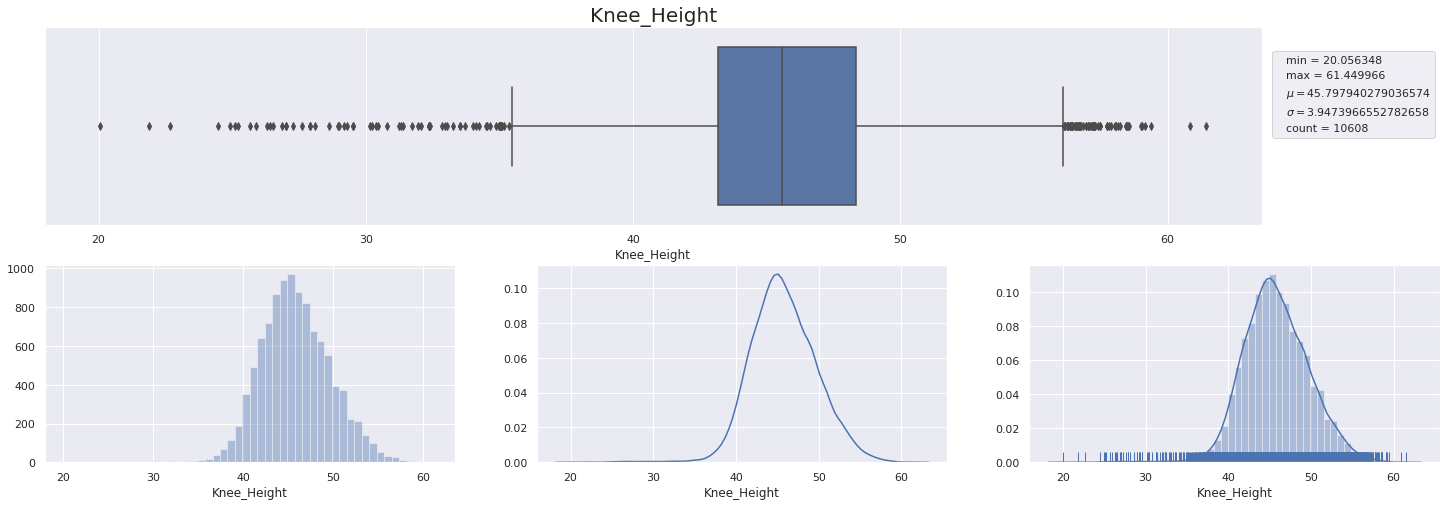

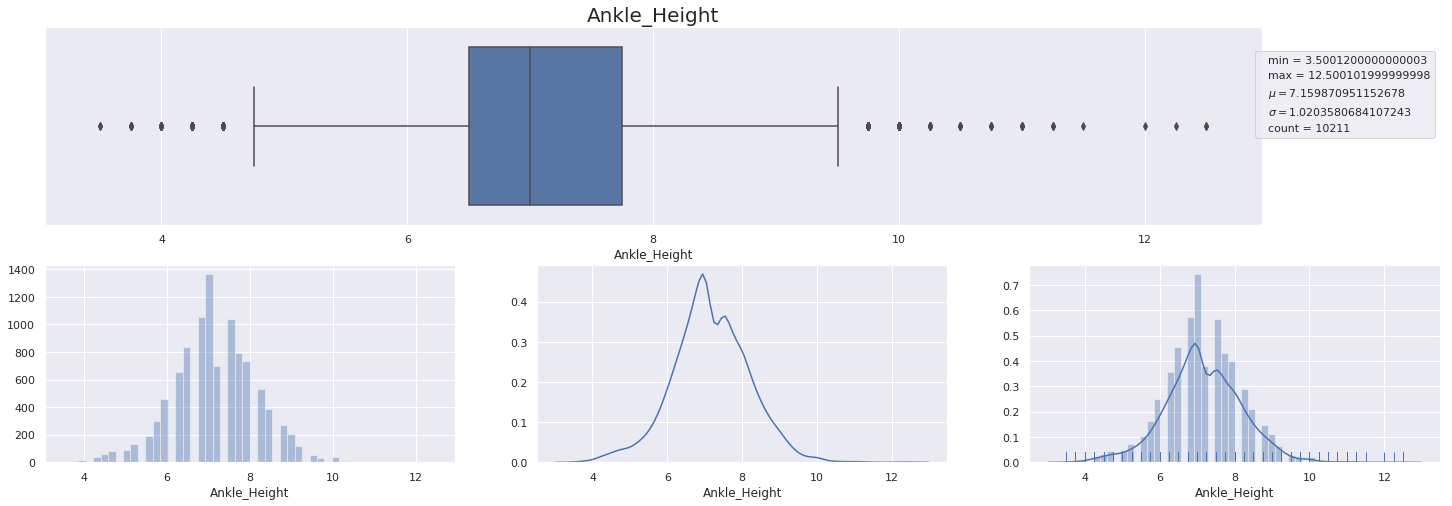

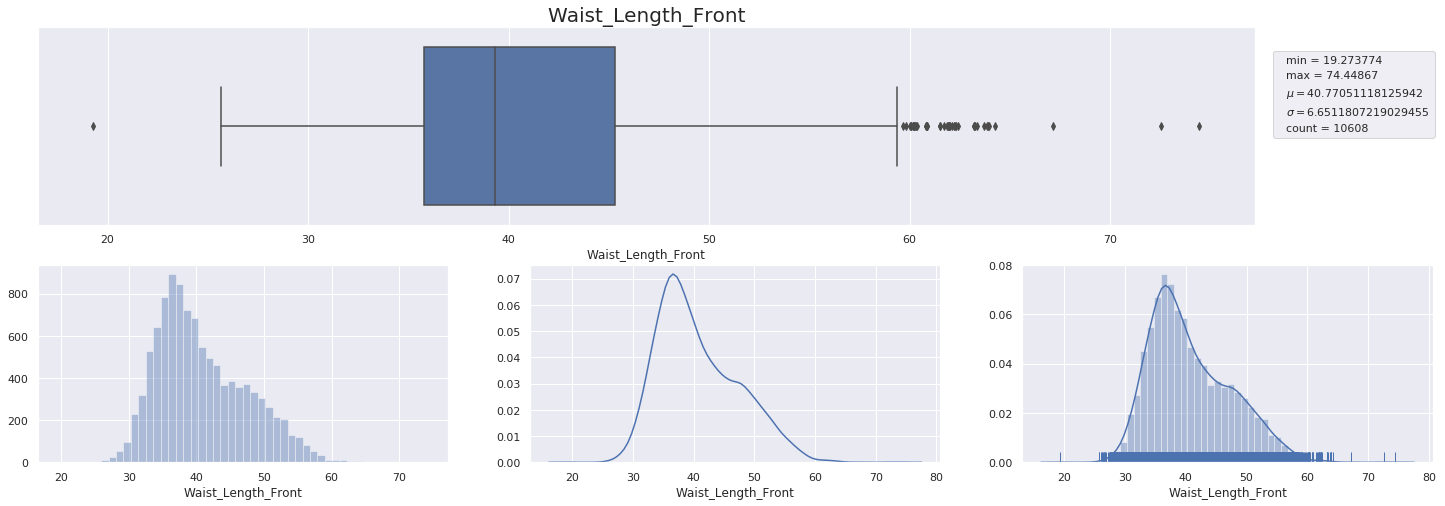

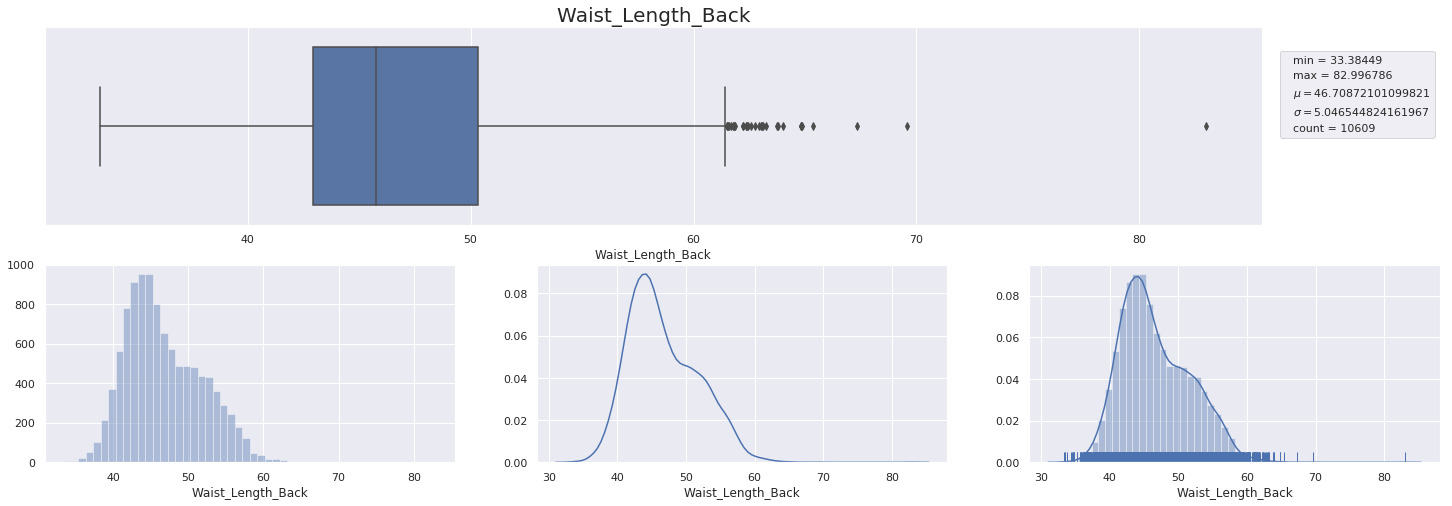

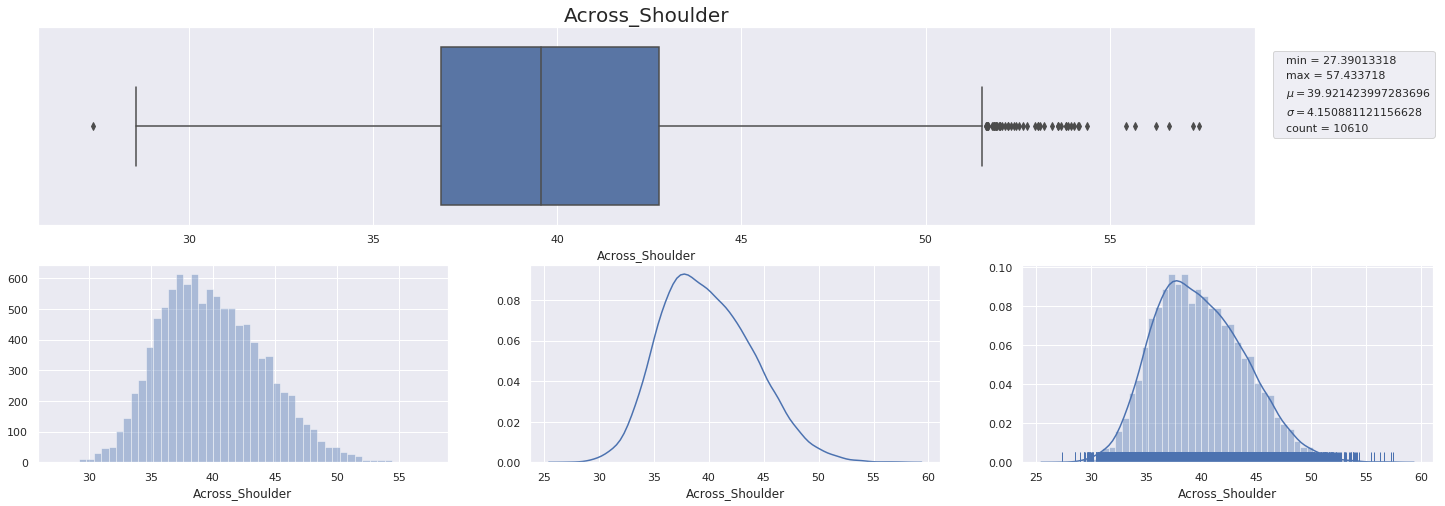

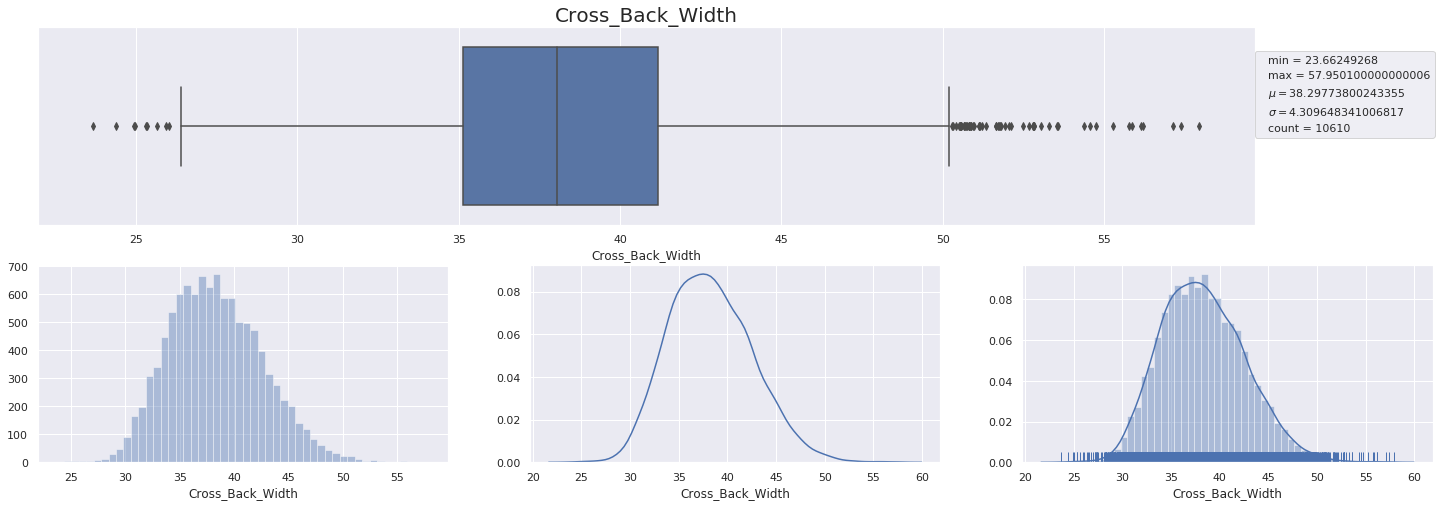

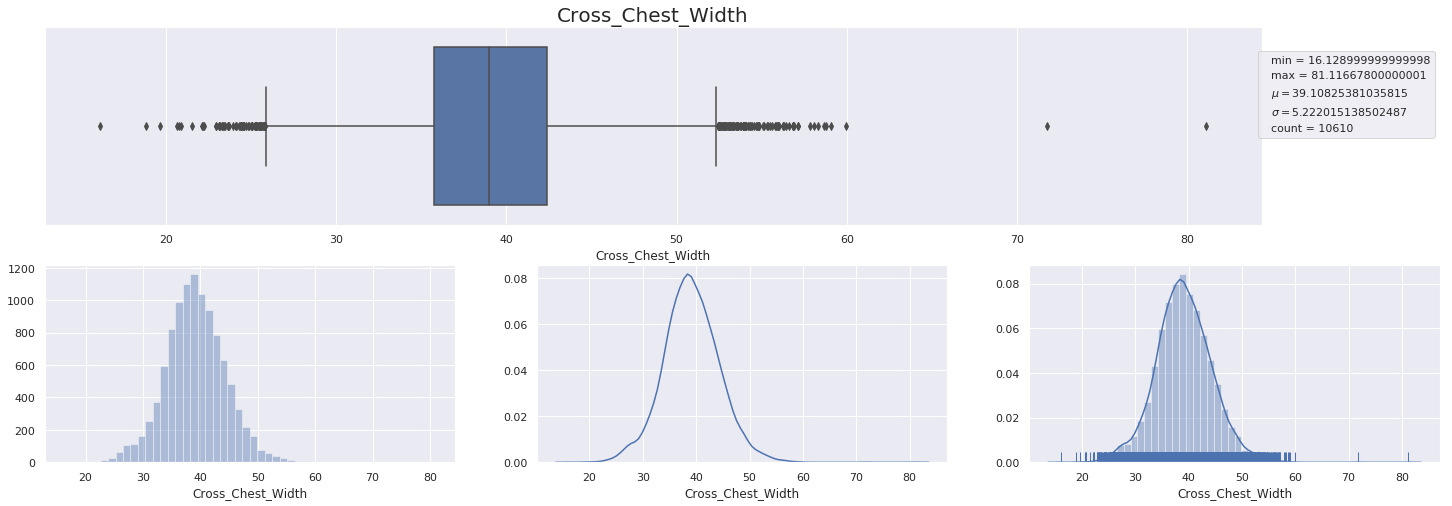

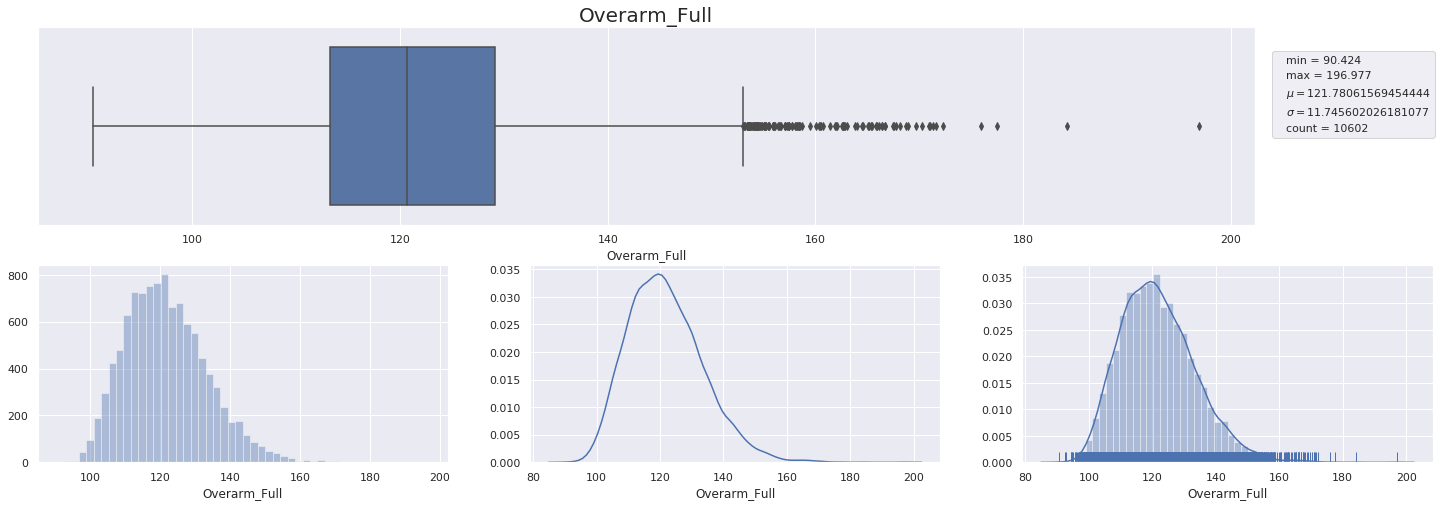

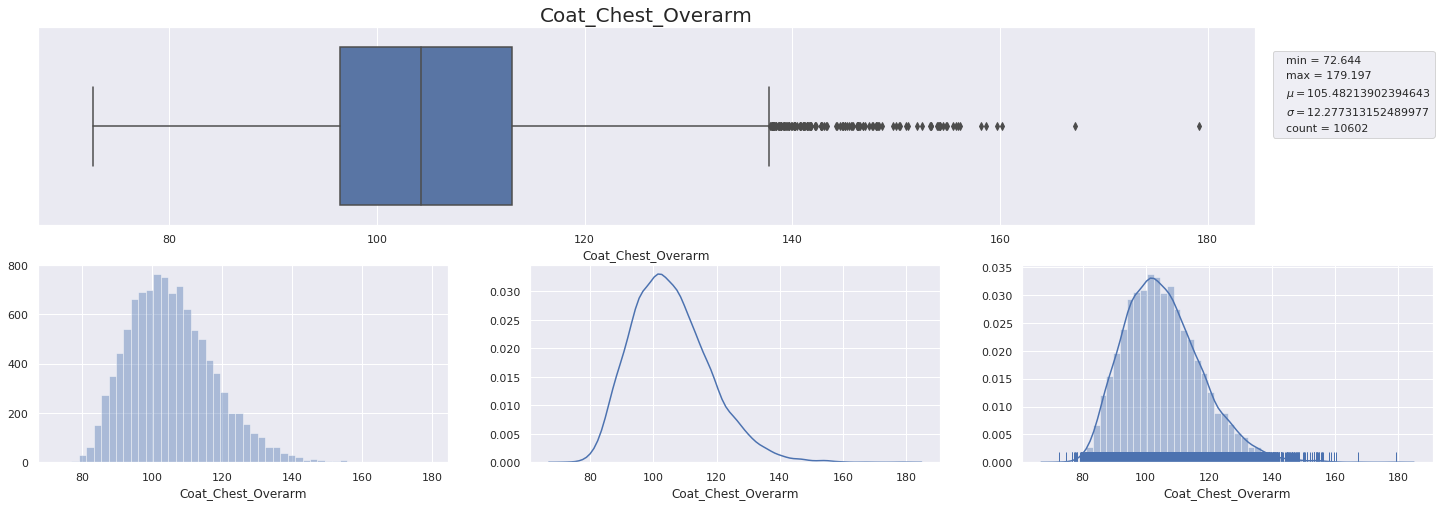

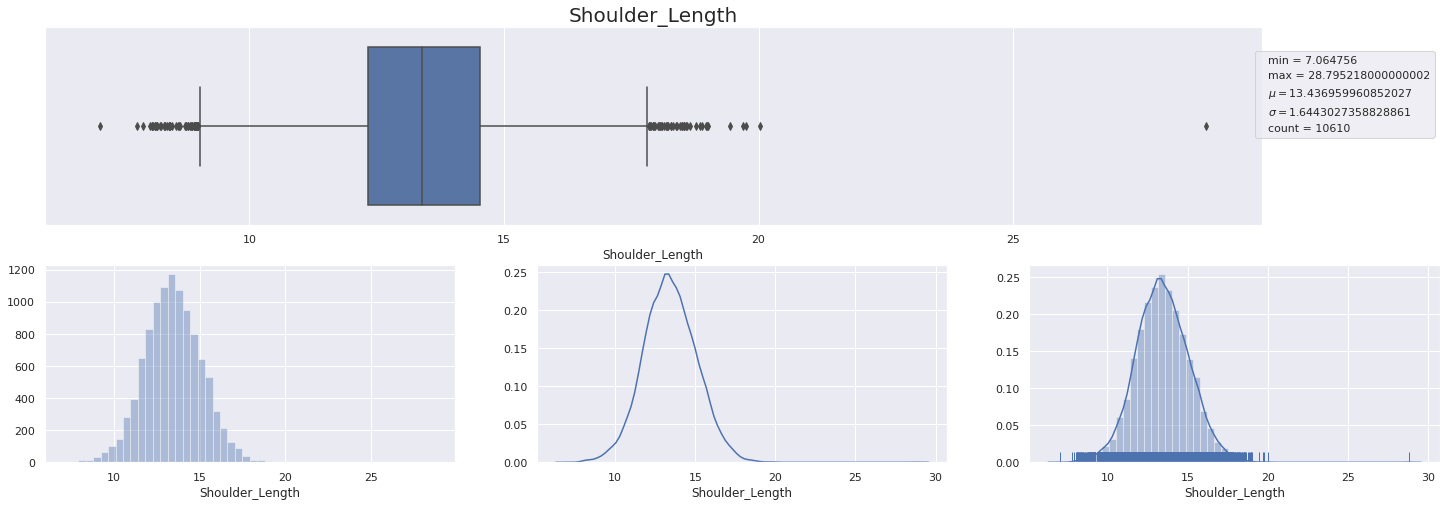

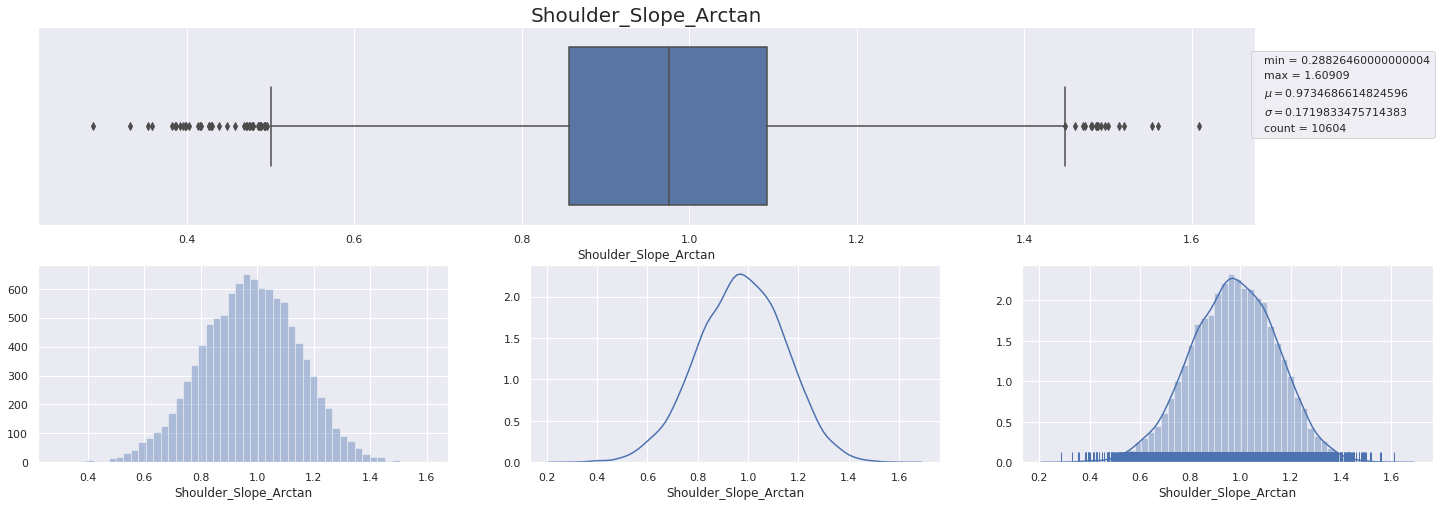

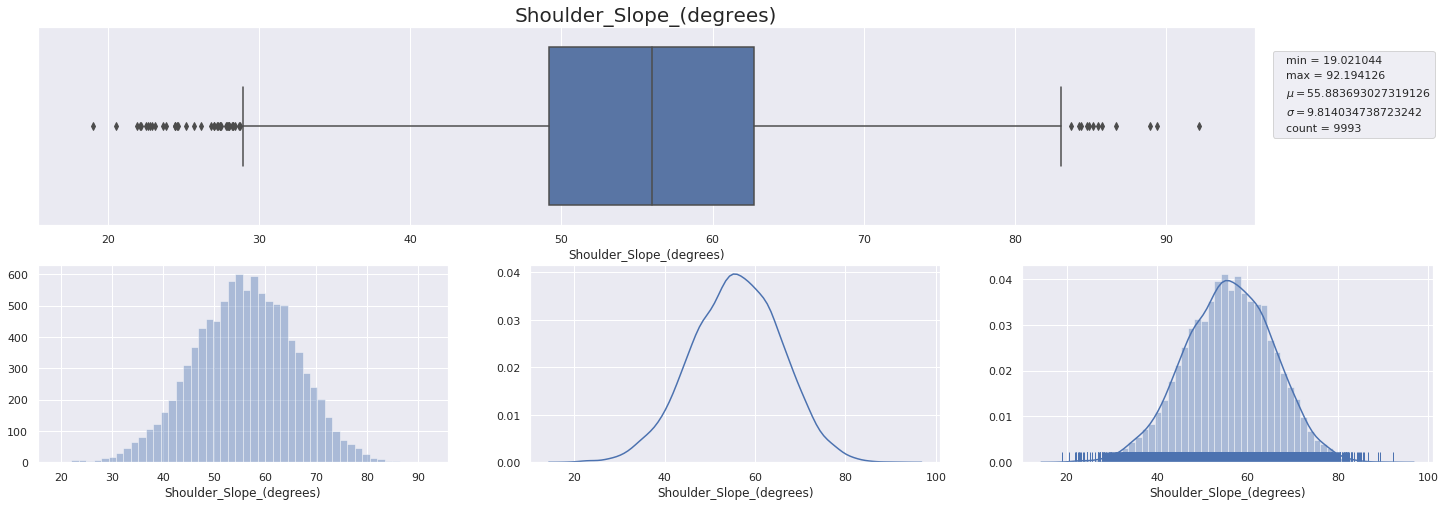

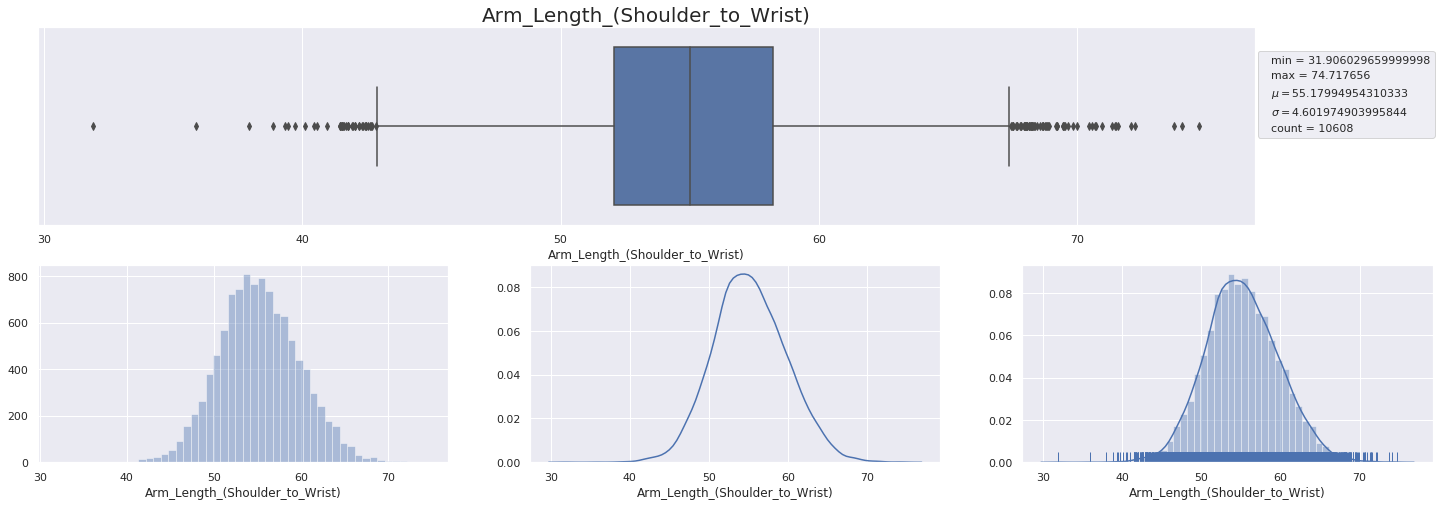

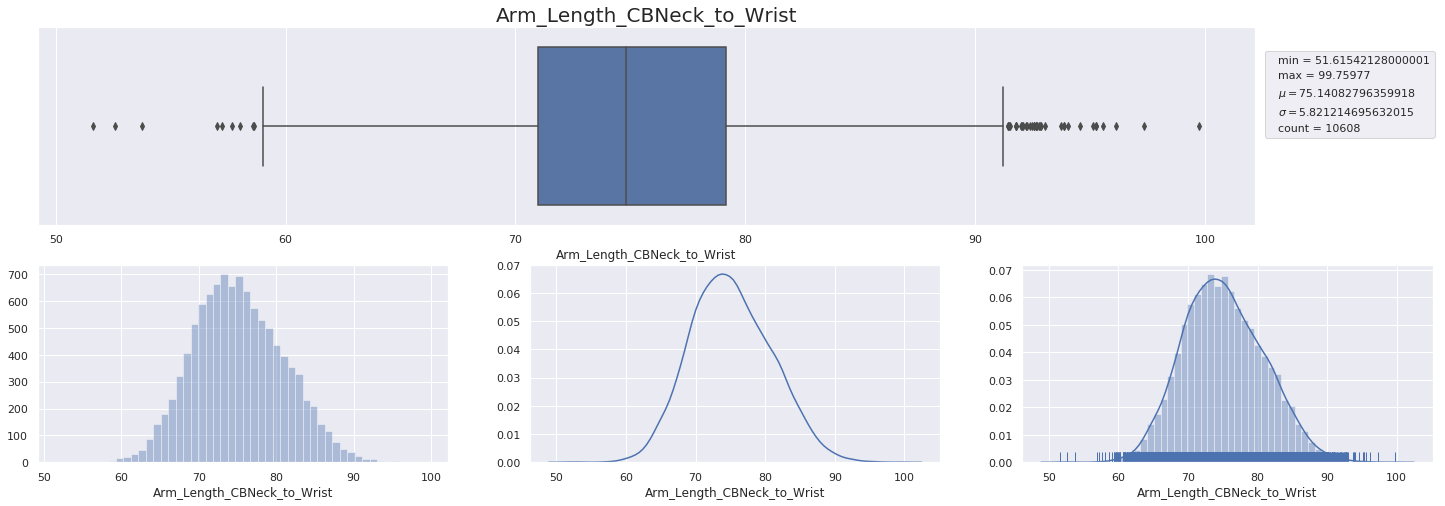

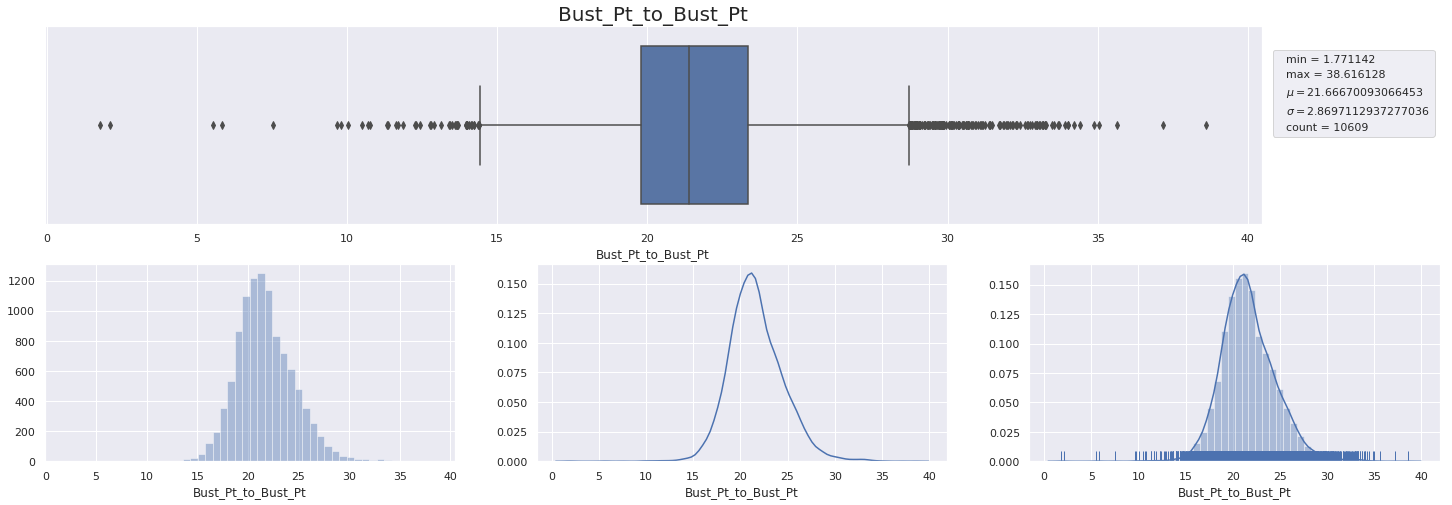

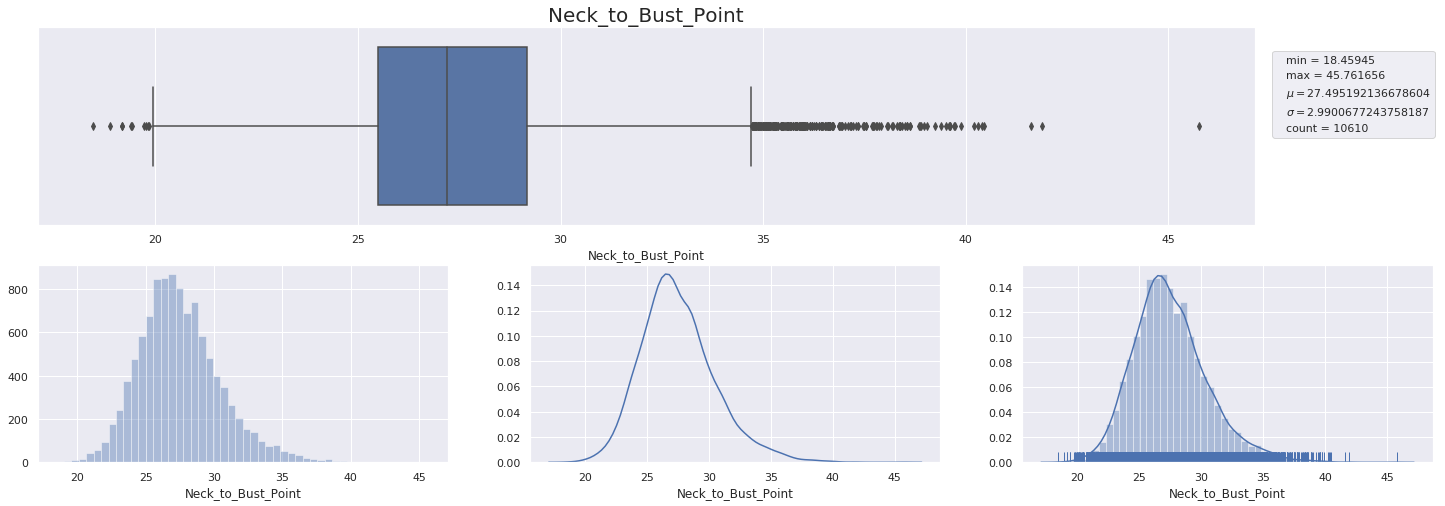

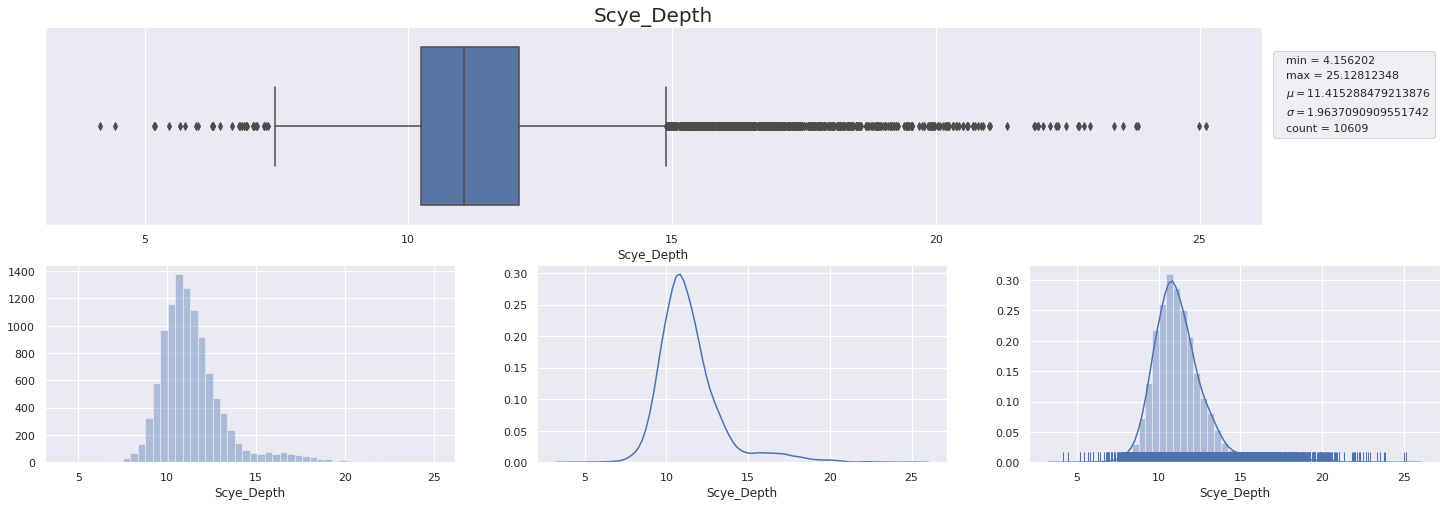

In [82]:
temp_list = list(['Height'] + ['Weight'] + num_list)
for item in temp_list:
    build_chart(df, item)